In [2]:
import pandas as pd
import numpy as np

In [3]:
whatsapp_chats=pd.read_csv("WhatsApp_Chat_with_Diamond.txt",sep="\t",header=None)
whatsapp_chats.head()

,0
0,"5/23/23, 9:58 PM - Messages and calls are end-..."
1,"5/24/23, 9:15 PM - Diamond 🔔: Kp"
2,"5/24/23, 9:16 PM - Diamond 🔔: Sariyeana samavam"
3,"5/24/23, 9:16 PM - Diamond 🔔: Call me"
4,"5/24/23, 9:26 PM - --: Cha pavam ra"


In [4]:
whatsapp_chats.tail(5)

,0
8408,"12/12/23, 1:59 PM - Diamond 🔔: Vickipedia na"
8409,"12/12/23, 2:04 PM - --: Sss"
8410,"12/12/23, 2:04 PM - Diamond 🔔: Na sudala bha"
8411,"12/12/23, 2:47 PM - --: LinkedIn interview ochina"
8412,"12/12/23, 2:50 PM - --: You deleted this message"


In [5]:
whatsapp_chats.shape # totally i have 8533 rows 

(8413, 1)

In [6]:
whatsapp_chats=whatsapp_chats.rename(columns={0:'Content'})

In [7]:
whatsapp_chats.head(5)

,Content
0,"5/23/23, 9:58 PM - Messages and calls are end-..."
1,"5/24/23, 9:15 PM - Diamond 🔔: Kp"
2,"5/24/23, 9:16 PM - Diamond 🔔: Sariyeana samavam"
3,"5/24/23, 9:16 PM - Diamond 🔔: Call me"
4,"5/24/23, 9:26 PM - --: Cha pavam ra"


In [8]:
def split_content(chat):
    chat['Date']=chat.Content.apply(lambda x:x[:8])
    chat['Date']=chat.Date.apply(lambda x:x.replace(' ',''))
    chat['Date']=chat.Date.apply(lambda x:x.replace(',',''))
    chat['Date']=pd.to_datetime(chat.Date,dayfirst=True)
    chat['Content']=chat.Content.apply(lambda x:x[18:])
    chat['Content']=chat.Content.apply(lambda str_replace:str_replace.replace('--','Kp'))
    chat['Content']=chat.Content.apply(lambda content:content.lstrip())
    chat['Content']=chat['Content'].apply(lambda x:x.replace('-',''))
    chat['Content']=chat.Content.apply(lambda content:content.lstrip())
    return chat


In [9]:
whatsapp_chats=split_content(whatsapp_chats)
whatsapp_chats.head(5)
#whatsapp_chats.tail(5)

,Content,Date
0,Messages and calls are endtoend encrypted. No ...,2023-05-23
1,Diamond 🔔: Kp,2023-05-24
2,Diamond 🔔: Sariyeana samavam,2023-05-24
3,Diamond 🔔: Call me,2023-05-24
4,Kp: Cha pavam ra,2023-05-24


In [10]:
whatsapp_chats.head()

,Content,Date
0,Messages and calls are endtoend encrypted. No ...,2023-05-23
1,Diamond 🔔: Kp,2023-05-24
2,Diamond 🔔: Sariyeana samavam,2023-05-24
3,Diamond 🔔: Call me,2023-05-24
4,Kp: Cha pavam ra,2023-05-24


In [11]:
# Drop first and last index
whatsapp_chats.drop(0,inplace=True)
whatsapp_chats.drop(whatsapp_chats.index[-1],inplace=True)

In [12]:
def day_month_year_split(chat):
    chat['Day']=chat['Date'].dt.day
    chat['Month']=chat['Date'].dt.month
    chat['Year']=chat['Date'].dt.year
    return chat

In [13]:
whatsapp_chats=day_month_year_split(whatsapp_chats)
whatsapp_chats.head(5)

,Content,Date,Day,Month,Year
1,Diamond 🔔: Kp,2023-05-24,24,5,2023
2,Diamond 🔔: Sariyeana samavam,2023-05-24,24,5,2023
3,Diamond 🔔: Call me,2023-05-24,24,5,2023
4,Kp: Cha pavam ra,2023-05-24,24,5,2023
5,Kp: ?,2023-05-24,24,5,2023


In [14]:
# Above we dont need Date column we can drop Date column
#whatsapp_chats=whatsapp_chats.drop('Date',axis=1)

In [15]:
whatsapp_chats.head(5)

,Content,Date,Day,Month,Year
1,Diamond 🔔: Kp,2023-05-24,24,5,2023
2,Diamond 🔔: Sariyeana samavam,2023-05-24,24,5,2023
3,Diamond 🔔: Call me,2023-05-24,24,5,2023
4,Kp: Cha pavam ra,2023-05-24,24,5,2023
5,Kp: ?,2023-05-24,24,5,2023


In [16]:
whatsapp_chats.tail(5)

,Content,Date,Day,Month,Year
8407,Diamond 🔔: Vicki yea,2023-12-12,12,12,2023
8408,Diamond 🔔: Vickipedia na,2023-12-12,12,12,2023
8409,Kp: Sss,2023-12-12,12,12,2023
8410,Diamond 🔔: Na sudala bha,2023-12-12,12,12,2023
8411,Kp: LinkedIn interview ochina,2023-12-12,12,12,2023


In [17]:
#Now almost analysis part is done let start to  visualize data

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
#chat by month here below i 
def chat_by_month_count(chat_by_month):
    chat_by_month=whatsapp_chats.groupby('Month').count().reset_index()
    chat_by_month.index=np.arange(1,len(chat_by_month)+1)
    chat_by_month=chat_by_month['Content']
    return chat_by_month

chat_by_month=chat_by_month_count(whatsapp_chats)
chat_by_month

1      508
2      229
3      171
4      297
5      782
6      851
7      761
8      719
9      895
10     949
11    1941
12     308
Name: Content, dtype: int64

Text(0, 0.5, 'Count')

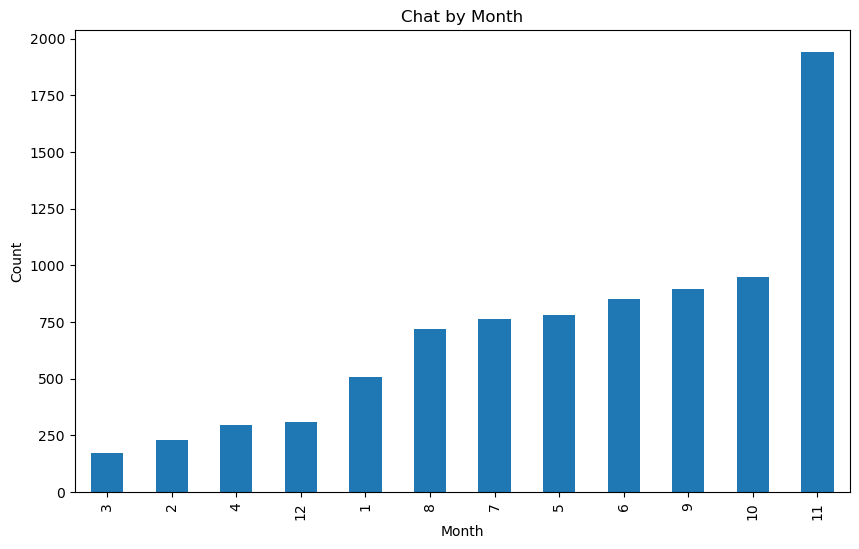

In [20]:
plt.figure(figsize=(10,6))
whatsapp_chats['Date'].dt.month.value_counts(ascending=True).sort_values().plot(kind='bar')
plt.title('Chat by Month')
plt.xlabel('Month')
plt.ylabel('Count')
#sns.histplot(whatsapp_chats,y=whatsapp_chats['Date'].dt.month)
# here below we both spend chat more time in November month

In [21]:
#Lets find if any emoj we used or not in our conversation
# Count the frequency of each emojies
# i think we may need some libiraires
#!pip install spacy
#!pip install spacymoji
#!python -m spacy download en_core_web_sm


import spacy
from spacymoji import Emoji

nlp=spacy.load('en_core_web_sm')
emoji=Emoji(nlp)
nlp.add_pipe('emoji',first=True)
nlp.pipe_names


['emoji',
 'tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner']

In [22]:
def Extract_Chat_Emoj(chat):
    doc=nlp(chat['Content'])
    emojis=[token.text for token in doc if token._.is_emoji]
    return emojis

emojidf=whatsapp_chats.apply(Extract_Chat_Emoj,axis=1)
emojidf

1       [🔔]
2       [🔔]
3       [🔔]
4        []
5        []
       ... 
8407    [🔔]
8408    [🔔]
8409     []
8410    [🔔]
8411     []
Length: 8411, dtype: object

In [23]:
#Above we got the emoji from our text next we need to get freqency of every emoji
#https://www.pauldesalvo.com/extract-emojis-from-python-strings-and-chart-frequency-using-spacy-pandas-and-plotly/
# Above website which i have used to find solution of this
emoji_count=(emojidf.apply(pd.Series)
            .stack()
            .value_counts()
            .rename('Count')
            .sort_values()
            .reset_index()
            .rename(columns={'index':'Emoji'}))

emoji_count
           
# .apply(pd.Series) to break up the list into seperate columns
# .stack() will collapse each column into one column
# .value_counts() is a handy function that returns a frequency of each item in the column


C:\Users\karuppasamy.v\AppData\Local\Temp\ipykernel_20864\4212023121.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  emoji_count=(emojidf.apply(pd.Series)


,Emoji,Count
0,❤️,1
1,☺️,1
2,🫶🏻,1
3,🫣,1
4,😎,1
5,👎🏿,1
6,🤕,1
7,☹️,1
8,🙌,1
9,🔒,1


In [24]:
import emoji
whatsapp_chats['Content']=whatsapp_chats.Content.apply(lambda content:emoji.replace_emoji(content,'')) # Here i removed emoji in my DF


In [25]:
whatsapp_chats.tail(5)

,Content,Date,Day,Month,Year
8407,Diamond : Vicki yea,2023-12-12,12,12,2023
8408,Diamond : Vickipedia na,2023-12-12,12,12,2023
8409,Kp: Sss,2023-12-12,12,12,2023
8410,Diamond : Na sudala bha,2023-12-12,12,12,2023
8411,Kp: LinkedIn interview ochina,2023-12-12,12,12,2023


In [26]:
whatsapp_chats['Chat_Person']=whatsapp_chats.Content.apply(lambda s:'Diamond' if 'Diamond' in s else 'Kp')

In [27]:
whatsapp_chats

,Content,Date,Day,Month,Year,Chat_Person
1,Diamond : Kp,2023-05-24,24,5,2023,Diamond
2,Diamond : Sariyeana samavam,2023-05-24,24,5,2023,Diamond
3,Diamond : Call me,2023-05-24,24,5,2023,Diamond
4,Kp: Cha pavam ra,2023-05-24,24,5,2023,Kp
5,Kp: ?,2023-05-24,24,5,2023,Kp
...,...,...,...,...,...,...
8407,Diamond : Vicki yea,2023-12-12,12,12,2023,Diamond
8408,Diamond : Vickipedia na,2023-12-12,12,12,2023,Diamond
8409,Kp: Sss,2023-12-12,12,12,2023,Kp
8410,Diamond : Na sudala bha,2023-12-12,12,12,2023,Diamond


In [28]:
Months={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
Months

{1: 'Jan',
 2: 'Feb',
 3: 'Mar',
 4: 'Apr',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'Aug',
 9: 'Sep',
 10: 'Oct',
 11: 'Nov',
 12: 'Dec'}

In [29]:
#def month_replace(chat):
whatsapp_chats['Month']=whatsapp_chats.Month.map(Months)
    

In [30]:
whatsapp_chats.tail(4) # here i replaced month values to month names

,Content,Date,Day,Month,Year,Chat_Person
8408,Diamond : Vickipedia na,2023-12-12,12,Dec,2023,Diamond
8409,Kp: Sss,2023-12-12,12,Dec,2023,Kp
8410,Diamond : Na sudala bha,2023-12-12,12,Dec,2023,Diamond
8411,Kp: LinkedIn interview ochina,2023-12-12,12,Dec,2023,Kp


In [31]:
whatsapp_chats.groupby('Chat_Person')['Content'].count().reset_index() # here i just show the count chat detail of me and myfrd

,Chat_Person,Content
0,Diamond,4143
1,Kp,4268


In [32]:
#Here i just showed the month wise chat data
whatsapp_chats.groupby(['Month','Chat_Person']).size().unstack(fill_value=0)


Chat_Person,Diamond,Kp
Month,,
Apr,142,155
Aug,342,377
Dec,154,154
Feb,106,123
Jan,237,271
July,387,374
June,427,424
Mar,77,94
May,365,417


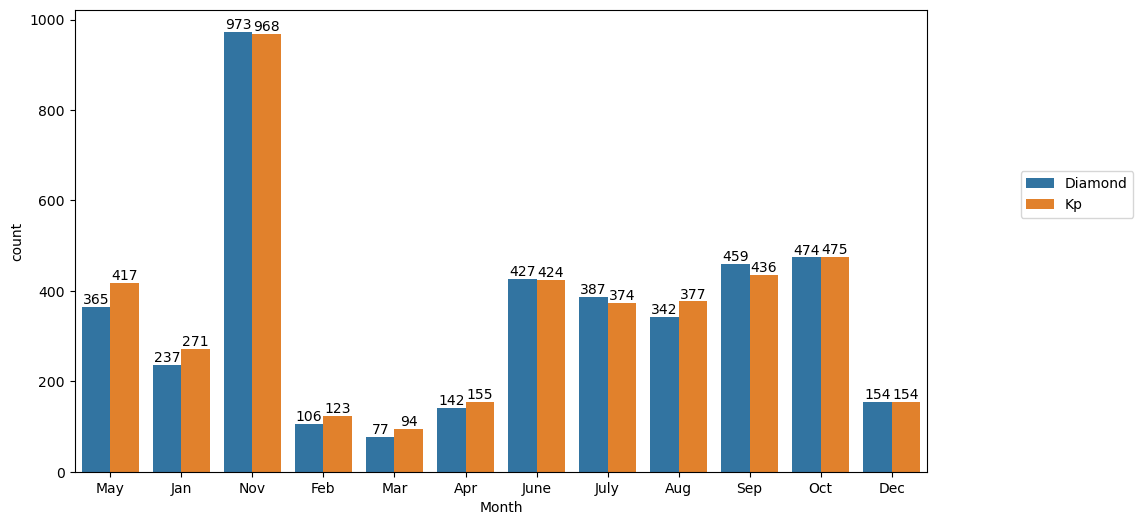

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
#sns.set_style('whitegrid')
ax=sns.countplot(whatsapp_chats,x=whatsapp_chats.Month,hue=whatsapp_chats.Chat_Person)
for label in ax.containers:
    ax.bar_label(label)
plt.legend(bbox_to_anchor=(1.25, 0.6),loc='center right')
plt.show()

In [87]:
# here i just showed top 5 month chat for each person
chat_by_order=whatsapp_chats.groupby(['Chat_Person','Month']).count().reset_index('Chat_Person')
chat_by_order.groupby('Chat_Person')['Content'].nlargest(5)



Chat_Person  Month
Diamond      Nov      973
             Oct      474
             Sep      459
             June     427
             July     387
Kp           Nov      968
             Oct      475
             Sep      436
             June     424
             May      417
Name: Content, dtype: int64

In [115]:
sum(whatsapp_chats.apply(lambda spl:sum(not q.isalpha() for q in spl['Content']),axis=1))


42924

In [116]:
whatsapp_chats.head()

,Content,Date,Day,Month,Year,Chat_Person,special_char
1,Diamond : Kp,2023-05-24,24,May,2023,Diamond,3
2,Diamond : Sariyeana samavam,2023-05-24,24,May,2023,Diamond,4
3,Diamond : Call me,2023-05-24,24,May,2023,Diamond,4
4,Kp: Cha pavam ra,2023-05-24,24,May,2023,Kp,4
5,Kp: ?,2023-05-24,24,May,2023,Kp,3


In [117]:
whatsapp_chats=whatsapp_chats.drop(['Date','special_char'],axis=1)

In [152]:
whatsapp_chats['Content']=whatsapp_chats.Content.apply(lambda word:word.replace('Diamond','') if 'Diamond' in word else word )
whatsapp_chats['Content']=whatsapp_chats.Content.apply(lambda word:word.replace('Kp','') if 'Kp' in word else word )
whatsapp_chats.head()

,Content,Day,Month,Year,Chat_Person
1,:,24,May,2023,Diamond
2,: Sariyeana samavam,24,May,2023,Diamond
3,: Call me,24,May,2023,Diamond
4,: Cha pavam ra,24,May,2023,Kp
5,: ?,24,May,2023,Kp


In [ ]:
for wpchat in whatsapp_chats:
    if wpchat['Content']=='Diamond' or wpchat['Content']=='Kp':
        wpchat.Content.replace('')
        

In [155]:
whatsapp_chats=whatsapp_chats.drop(['Day','Month','Year'],axis=1)

In [171]:
whatsapp_chats['Chat_Person']=pd.get_dummies(whatsapp_chats['Chat_Person'],drop_first=True)


In [172]:
whatsapp_chats

,Content,Chat_Person
1,:,0
2,: Sariyeana samavam,0
3,: Call me,0
4,: Cha pavam ra,1
5,: ?,1
...,...,...
8407,: Vicki yea,0
8408,: Vickipedia na,0
8409,: Sss,1
8410,: Na sudala bha,0


In [174]:
whatsapp_chats.drop('Chat_Person',axis=1,inplace=True)

In [173]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import regex as re

In [ ]:
## https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do 
# refer this website to understand the tokenizer,texts_to_sequences,pad_sequences

In [185]:
#Tokenize Data
tokenizer=Tokenizer()
tokenizer.fit_on_texts(whatsapp_chats.Content)
total_words=len(tokenizer.word_index)+1



In [188]:
#Create input Sequence
input_Sequence=[]
for line in whatsapp_chats.Content:
    token_list=tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequnce=token_list[:i+1]
        input_Sequence.append(n_gram_sequnce)
        

In [192]:
# Pad sequences and split into predictors and label
max_seq_len=max([len(seq) for seq in input_Sequence])
input_Sequence=np.array(pad_sequences(
input_Sequence,maxlen=max_seq_len,padding='pre'))
X,y=input_Sequence[:,:-1],input_Sequence[:,-1]

In [196]:
# Convert target data to one-hot encoding
import tensorflow as tf
y=tf.keras.utils.to_categorical(y,num_classes=total_words)

In [198]:
#Define the model
model=Sequential()
model.add(Embedding(total_words,10,input_length=max_seq_len-1))
model.add(LSTM(128))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


In [199]:
model.fit(X,y,epochs=200,verbose=1)

Epoch 1/200
476/476 [==============================] - 26s 45ms/step - loss: 7.5277 - accuracy: 0.0348
Epoch 2/200
476/476 [==============================] - 24s 50ms/step - loss: 6.6918 - accuracy: 0.0856
Epoch 3/200
476/476 [==============================] - 23s 47ms/step - loss: 6.3740 - accuracy: 0.1262
Epoch 4/200
476/476 [==============================] - 22s 46ms/step - loss: 6.1695 - accuracy: 0.1385
Epoch 5/200
476/476 [==============================] - 24s 51ms/step - loss: 5.9976 - accuracy: 0.1458
Epoch 6/200
476/476 [==============================] - 22s 46ms/step - loss: 5.8386 - accuracy: 0.1508
Epoch 7/200
476/476 [==============================] - 26s 55ms/step - loss: 5.6848 - accuracy: 0.1579
Epoch 8/200
476/476 [==============================] - 23s 48ms/step - loss: 5.5399 - accuracy: 0.1608
Epoch 9/200
476/476 [==============================] - 25s 53ms/step - loss: 5.4032 - accuracy: 0.1654
Epoch 10/200
476/476 [==============================] - 22s 47ms/step - l

476/476 [==============================] - 22s 47ms/step - loss: 0.7417 - accuracy: 0.7582
Epoch 158/200
476/476 [==============================] - 24s 51ms/step - loss: 0.7406 - accuracy: 0.7588
Epoch 159/200
476/476 [==============================] - 24s 50ms/step - loss: 0.7405 - accuracy: 0.7590
Epoch 160/200
476/476 [==============================] - 25s 53ms/step - loss: 0.7394 - accuracy: 0.7578
Epoch 161/200
476/476 [==============================] - 24s 50ms/step - loss: 0.7429 - accuracy: 0.7603
Epoch 162/200
476/476 [==============================] - 24s 50ms/step - loss: 1.3122 - accuracy: 0.6713
Epoch 163/200
476/476 [==============================] - 24s 51ms/step - loss: 0.8271 - accuracy: 0.7539
Epoch 164/200
476/476 [==============================] - 24s 50ms/step - loss: 0.7719 - accuracy: 0.7577
Epoch 165/200
476/476 [==============================] - 23s 49ms/step - loss: 0.7577 - accuracy: 0.7607
Epoch 166/200
476/476 [==============================] - 24s 50ms/ste

In [207]:
text='இலக்கு ஒன்றுதான்'
next_word=2
for _ in range(next_word):
    token_list=tokenizer.texts_to_sequences([text])[0]
    token_list=pad_sequences(
    [token_list],maxlen=max_seq_len-1,padding='pre')
    predicted_probs=model.predict(token_list)
    predicted_word=tokenizer.index_word[np.argmax(predicted_probs)]
    text+=" " + predicted_word
print("Word :",text)

1/1 [==============================] - 0s 48ms/step
Word : இலக்கு ஒன்றுதான் இனத்தின் விடுதலை
